In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('sleep.csv')

In [3]:
df.head()

,Unnamed: 0,Duration (min),Text,date_time
0,0,12.0,Émilie slept (12m),2023-02-13 13:47:00
1,21,741.0,Émilie slept (12h21m),2021-08-13 18:51:00
2,23,106.0,Émilie slept (1h46m),2021-08-13 14:45:00
3,27,131.0,Émilie slept (2h11m),2021-08-13 10:04:00
4,30,688.0,Émilie slept (11h28m),2021-08-12 18:58:00


In [4]:
df.tail()

,Unnamed: 0,Duration (min),Text,date_time
574,2690,95.0,Emilie slept (1h35m),2020-12-23 09:45:00
575,2695,83.0,Emilie slept (1h23m),2020-12-23 07:40:00
576,2708,57.0,Emilie slept (57m),2020-12-22 17:20:00
577,2710,128.0,Emilie slept (2h08m),2020-12-22 14:35:00
578,2713,112.0,Emilie slept (1h52m),2020-12-22 12:25:00


In [7]:
df = df.iloc[1:]

In [8]:
df.size

2312

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 1 to 578
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Duration (min)  578 non-null    float64       
 1   Text            578 non-null    object        
 2   date_time       578 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.7+ KB


<AxesSubplot:>

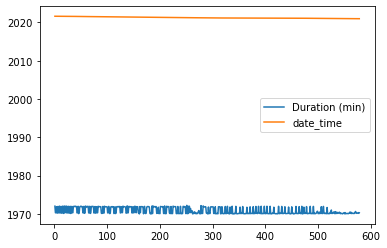

In [12]:
df.plot()

In [13]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

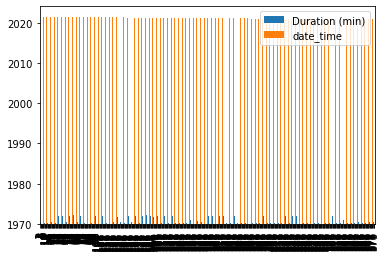

In [14]:
plt.figure();
df.plot(kind="bar");


In [15]:
dfz = df.copy()

In [16]:
dfz = dfz.drop(columns=['Text'])

In [17]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 1 to 578
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Duration (min)  578 non-null    float64       
 1   date_time       578 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.2 KB


In [18]:
dfz['Date_time'] = dfz['date_time'].astype('datetime64[ns]')
print("Original Dataframe:")
print(dfz.head())
dfz['Year'] = dfz['date_time'].apply(lambda x: "%d" % (x.year))
result = dfz.groupby(['Year']).size()
print("\nSleep entries by year:")
print(result)

Original Dataframe:
   Duration (min)           date_time           Date_time
1           741.0 2021-08-13 18:51:00 2021-08-13 18:51:00
2           106.0 2021-08-13 14:45:00 2021-08-13 14:45:00
3           131.0 2021-08-13 10:04:00 2021-08-13 10:04:00
4           688.0 2021-08-12 18:58:00 2021-08-12 18:58:00
5            82.0 2021-08-12 15:05:00 2021-08-12 15:05:00

Sleep entries by year:
Year
2020     42
2021    536
dtype: int64


In [19]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 1 to 578
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Duration (min)  578 non-null    float64       
 1   date_time       578 non-null    datetime64[ns]
 2   Date_time       578 non-null    datetime64[ns]
 3   Year            578 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 18.2+ KB


In [20]:
dfz

,Duration (min),date_time,Date_time,Year
1,741.0,2021-08-13 18:51:00,2021-08-13 18:51:00,2021
2,106.0,2021-08-13 14:45:00,2021-08-13 14:45:00,2021
3,131.0,2021-08-13 10:04:00,2021-08-13 10:04:00,2021
4,688.0,2021-08-12 18:58:00,2021-08-12 18:58:00,2021
5,82.0,2021-08-12 15:05:00,2021-08-12 15:05:00,2021
...,...,...,...,...
574,95.0,2020-12-23 09:45:00,2020-12-23 09:45:00,2020
575,83.0,2020-12-23 07:40:00,2020-12-23 07:40:00,2020
576,57.0,2020-12-22 17:20:00,2020-12-22 17:20:00,2020
577,128.0,2020-12-22 14:35:00,2020-12-22 14:35:00,2020


In [21]:
from datetime import datetime as dt
dfz['Date_time'] = dfz['date_time'].dt.normalize()

In [22]:
dfz.nunique()

Duration (min)    220
date_time         575
Date_time         210
Year                2
dtype: int64

In [23]:
dfz

,Duration (min),date_time,Date_time,Year
1,741.0,2021-08-13 18:51:00,2021-08-13,2021
2,106.0,2021-08-13 14:45:00,2021-08-13,2021
3,131.0,2021-08-13 10:04:00,2021-08-13,2021
4,688.0,2021-08-12 18:58:00,2021-08-12,2021
5,82.0,2021-08-12 15:05:00,2021-08-12,2021
...,...,...,...,...
574,95.0,2020-12-23 09:45:00,2020-12-23,2020
575,83.0,2020-12-23 07:40:00,2020-12-23,2020
576,57.0,2020-12-22 17:20:00,2020-12-22,2020
577,128.0,2020-12-22 14:35:00,2020-12-22,2020


In [24]:
# for index, row in df.iterrows():
#     (row["firstname"]) 

In [25]:
sleep_days = dfz.groupby(["Date_time"])["Duration (min)"].sum()
print(sleep_days)

Date_time
2020-12-22    297.0
2020-12-23    328.0
2020-12-25    956.0
2020-12-26    563.0
2020-12-27    716.0
              ...  
2021-08-09    935.0
2021-08-10    949.0
2021-08-11    940.0
2021-08-12    860.0
2021-08-13    978.0
Name: Duration (min), Length: 210, dtype: float64


In [26]:
sleeps = sleep_days.to_frame(name='duration')

In [27]:
sleeps.reset_index()

,Date_time,duration
0,2020-12-22,297.0
1,2020-12-23,328.0
2,2020-12-25,956.0
3,2020-12-26,563.0
4,2020-12-27,716.0
...,...,...
205,2021-08-09,935.0
206,2021-08-10,949.0
207,2021-08-11,940.0
208,2021-08-12,860.0


<AxesSubplot:xlabel='Date_time'>

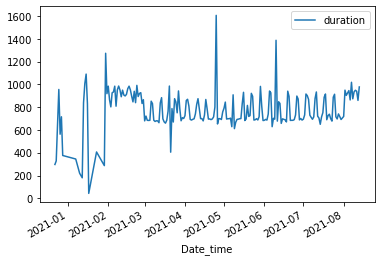

In [28]:
sleeps.plot()

In [30]:
sleeps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2020-12-22 to 2021-08-13
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  210 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [31]:
sleeps['duration']

Date_time
2020-12-22    297.0
2020-12-23    328.0
2020-12-25    956.0
2020-12-26    563.0
2020-12-27    716.0
              ...  
2021-08-09    935.0
2021-08-10    949.0
2021-08-11    940.0
2021-08-12    860.0
2021-08-13    978.0
Name: duration, Length: 210, dtype: float64

In [35]:
hours = []
for index, row in sleeps.iterrows():
    hours.append((row["duration"] /60).round(2))
    

In [36]:
sleeps['hours'] = hours

In [37]:
sleeps

,duration,hours
Date_time,,
2020-12-22,297.0,4.95
2020-12-23,328.0,5.47
2020-12-25,956.0,15.93
2020-12-26,563.0,9.38
2020-12-27,716.0,11.93
...,...,...
2021-08-09,935.0,15.58
2021-08-10,949.0,15.82
2021-08-11,940.0,15.67


In [39]:
schlaf = sleeps.copy()

In [41]:
schlaf = schlaf.drop(columns=['duration'])

<AxesSubplot:xlabel='Date_time'>

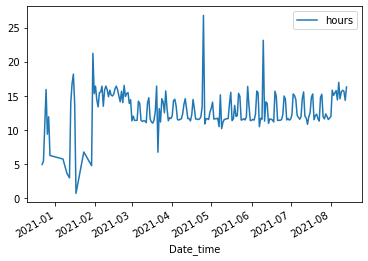

In [50]:
schlaf.plot()

<AxesSubplot:xlabel='Date_time'>

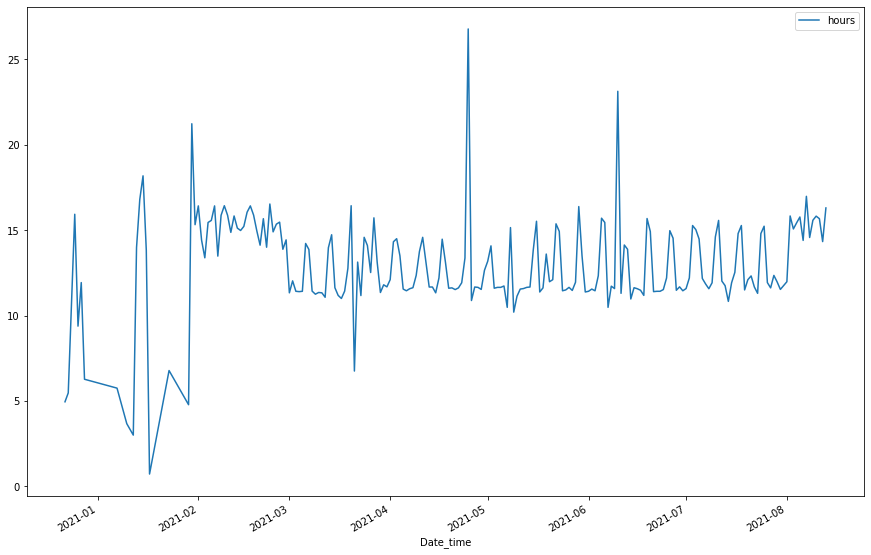

In [51]:
schlaf.plot(figsize=(15, 10))

In [52]:
df

,Duration (min),Text,date_time
1,741.0,Émilie slept (12h21m),2021-08-13 18:51:00
2,106.0,Émilie slept (1h46m),2021-08-13 14:45:00
3,131.0,Émilie slept (2h11m),2021-08-13 10:04:00
4,688.0,Émilie slept (11h28m),2021-08-12 18:58:00
5,82.0,Emilie slept (1h22m),2021-08-12 15:05:00
...,...,...,...
574,95.0,Emilie slept (1h35m),2020-12-23 09:45:00
575,83.0,Emilie slept (1h23m),2020-12-23 07:40:00
576,57.0,Emilie slept (57m),2020-12-22 17:20:00
577,128.0,Emilie slept (2h08m),2020-12-22 14:35:00


In [63]:
df.iloc[400:]

,Duration (min),Text,date_time
401,25.0,Emilie slept (25m),2021-02-14 11:30:00
402,57.0,Emilie slept (57m),2021-02-14 08:53:00
403,735.0,Emilie slept (12h15m),2021-02-13 19:00:00
404,39.0,Emilie slept (39m),2021-02-13 16:20:00
405,39.0,Emilie slept (39m),2021-02-13 14:05:00
...,...,...,...
574,95.0,Emilie slept (1h35m),2020-12-23 09:45:00
575,83.0,Emilie slept (1h23m),2020-12-23 07:40:00
576,57.0,Emilie slept (57m),2020-12-22 17:20:00
577,128.0,Emilie slept (2h08m),2020-12-22 14:35:00


In [65]:
march = df.iloc[300:]

In [66]:
march

,Duration (min),Text,date_time
301,677.0,Emilie slept (11h17m),2021-03-07 19:04:00
302,42.0,Emilie slept (42m),2021-03-07 15:10:00
303,73.0,Emilie slept (1h13m),2021-03-07 12:07:00
304,40.0,Emilie slept (40m),2021-03-07 08:01:00
305,687.0,Emilie slept (11h27m),2021-03-06 18:55:00
...,...,...,...
574,95.0,Emilie slept (1h35m),2020-12-23 09:45:00
575,83.0,Emilie slept (1h23m),2020-12-23 07:40:00
576,57.0,Emilie slept (57m),2020-12-22 17:20:00
577,128.0,Emilie slept (2h08m),2020-12-22 14:35:00
